In [201]:
# Dependencies and Setup
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import os 
import requests 
import time 
import sklearn as sk
import seaborn as sns

import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data 

import scipy.cluster.hierarchy as sch 

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cross_decomposition import CCA 
from sklearn.cluster import AgglomerativeClustering  
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.random_projection import SparseRandomProjection

# import keras
# from keras.models import Sequential, Model
# from keras.layers import Dense
# from keras.optimizers import Adam


%cd "C:\Users\kwlei\Documents\GitHub\FINAL PROJECT\ANES"

# I did use almost all them playing with (**ahem**) exploring the data. 

C:\Users\kwlei\Documents\GitHub\FINAL PROJECT\ANES


In [202]:
load = "ANESgo.csv" 
A = pd.read_csv(load, low_memory=False) 

In [203]:
load = "AnesY.csv" 
Y = pd.read_csv(load, low_memory=False) 

In [204]:
A.tail(10)

,ACA,actGlobeWarm,angryObama,approveObama,apprPresident,birthrightb,birthrightStr,climateDeny,climDeny,collegeaa,...,spSchool,spScience,spSocSec,spWelfare,SUMappBirthright,SUMdeportKids,trustGovt,trustPeople,violenceOK,YOB
1810,3,3,2,1,1,3,3,1,1,1,...,3,3,2,1,6,6,3,2,1,1957
1811,3,2,1,1,1,3,3,2,1,1,...,3,3,3,2,6,6,4,2,1,1934
1812,1,2,4,1,2,1,1,2,1,2,...,3,1,3,1,1,1,5,4,1,1970
1813,1,3,3,2,2,1,3,2,1,1,...,3,3,3,1,2,4,4,3,1,1980
1814,3,3,1,1,1,3,1,1,1,3,...,3,2,2,2,7,6,4,2,1,1978
1815,3,3,2,2,1,1,2,1,1,1,...,3,3,2,2,3,4,4,2,1,1984
1816,1,1,3,1,2,3,1,2,2,1,...,3,2,3,1,7,6,3,5,1,1962
1817,1,2,4,1,2,1,1,1,1,1,...,3,2,3,1,1,5,4,3,1,1982
1818,3,3,1,2,1,3,3,1,1,3,...,3,3,2,3,6,6,4,3,2,1967
1819,1,1,4,1,1,1,3,3,1,3,...,3,3,3,1,2,2,2,3,5,1974


In [205]:
Y.describe()

,y
count,1820.000000
mean,0.524236
std,0.338738
min,0.000000
25%,0.200000
50%,0.575000
75%,0.850000
max,1.000000


In [206]:
# anes.to_csv('anesPanda.csv', index=False)

In [207]:
A.describe() 


# there are no case numbers to interfere with the cluster analysis

,ACA,actGlobeWarm,angryObama,approveObama,apprPresident,birthrightb,birthrightStr,climateDeny,climDeny,collegeaa,...,spSchool,spScience,spSocSec,spWelfare,SUMappBirthright,SUMdeportKids,trustGovt,trustPeople,violenceOK,YOB
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,...,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,1.952747,2.310989,2.342308,1.229121,1.478571,2.102198,1.717033,1.765385,1.170879,1.721429,...,2.582418,2.535165,2.549451,1.703846,4.250000,4.582967,3.609341,2.776374,1.212088,1963.267582
std,0.924273,0.790258,1.341137,0.420383,0.499678,0.995037,0.924670,0.746190,0.376507,0.789487,...,0.670856,0.632955,0.600783,0.773166,2.605577,1.748709,0.891978,0.894053,0.665713,15.262855
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1926.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1951.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,6.000000,5.000000,4.000000,3.000000,1.000000,1963.000000
75%,3.000000,3.000000,4.000000,1.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,7.000000,6.000000,4.000000,3.000000,1.000000,1977.000000
max,3.000000,3.000000,5.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,7.000000,6.000000,5.000000,5.000000,5.000000,1989.000000


In [208]:
# A.dtypes

# They are all int64 if you want to look.

In [214]:
# from sklearn.cluster import KMeans 
clusters = 1
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(anes) 
print(kmeans.labels_)
print(kmeans.inertia_) 


[0 0 0 ... 0 0 0]
514465.52747252746


In [215]:
# from sklearn.cluster import KMeans 
clusters = 2
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(A) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[0 0 0 ... 1 1 1]
204909.497586935


In [216]:
# from sklearn.cluster import KMeans 
clusters = 3
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(A) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[2 0 0 ... 1 2 1]
144495.6107929415


In [217]:
# from sklearn.cluster import KMeans 
clusters = 4
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(A) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[1 0 2 ... 3 1 1]
122497.56131065129


In [218]:
# from sklearn.cluster import KMeans 
clusters = 5
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(A) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[2 4 1 ... 0 3 3]
110229.1499178809


In [219]:
# from sklearn.cluster import KMeans 
clusters = 6
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(A) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[2 0 5 ... 1 3 3]
102979.76445433653


In [220]:
# from sklearn.cluster import KMeans 
clusters = 7
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(A) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[0 6 3 ... 1 5 4]
96963.1184752011


In [221]:
# from sklearn.cluster import KMeans 
clusters = 8
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(A) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[6 3 0 ... 1 2 7]
90593.17921710823


In [222]:
# from sklearn.cluster import KMeans 
clusters = 9
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(A) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[7 4 0 ... 5 8 2]
85181.5619633466


In [223]:
# from sklearn.cluster import KMeans 
clusters = 10
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(A) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[3 8 0 ... 1 7 2]
82093.82010340915


In [224]:
# from sklearn.cluster import KMeans 
clusters = 11
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(A) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[7 5 8 ... 2 4 0]
78874.2810493045


In [225]:
# Okay, so using the elbow method, we want three clusters.
# you can call it sill and range if you want. Three clusters. 


In [226]:
#   from sklearn.cluster import KMeans

#   km = KMeans(n_clusters=12, random_state=1)
#   new = A._get_numeric_data().dropna(axis=1)
#   kmeans.fit(new)
#   predict=km.predict(new)

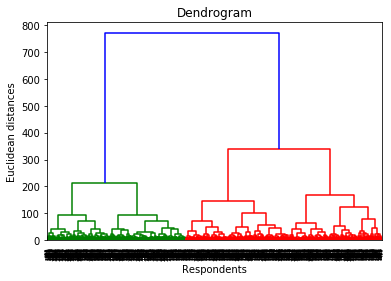

In [227]:
dendrogram = sch.dendrogram(sch.linkage(A, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Respondents')
plt.ylabel('Euclidean distances')
plt.show()

In [229]:
y = Y.y

In [231]:
pca = PCA(n_components=12, whiten = False, random_state = 42)
A_pca = pca.fit_transform(A)
A_pca_reconst = pca.inverse_transform(A_pca)

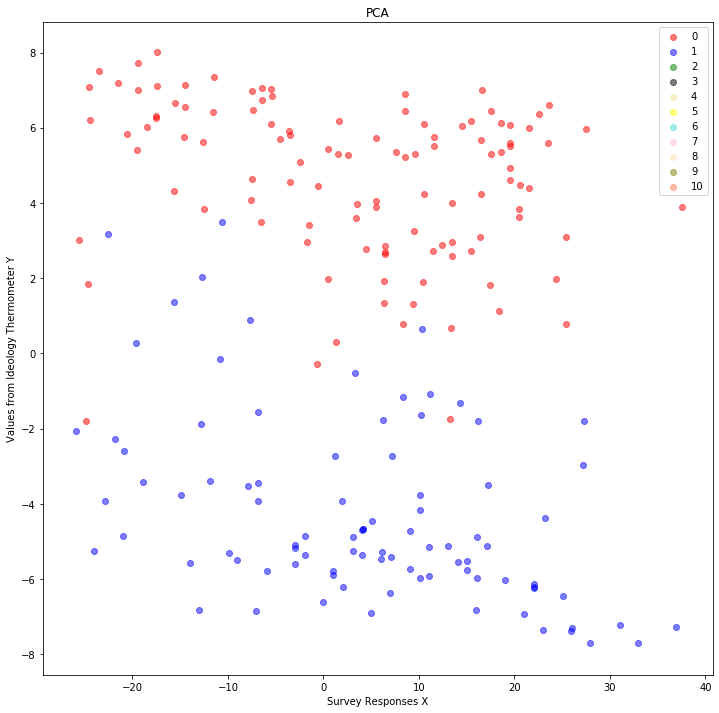

In [232]:
plt.figure(figsize=(12,12))

plt.scatter(A_pca[y==0, 0], A_pca[y==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(A_pca[y==1, 0], A_pca[y==1, 1], color='blue', alpha=0.5,label='1')
plt.scatter(A_pca[y==2, 0], A_pca[y==2, 1], color='green', alpha=0.5,label='2')
plt.scatter(A_pca[y==3, 0], A_pca[y==3, 1], color='black', alpha=0.5,label='3')
plt.scatter(A_pca[y==4, 0], A_pca[y==4, 1], color='khaki', alpha=0.5,label='4')
plt.scatter(A_pca[y==5, 0], A_pca[y==5, 1], color='yellow', alpha=0.5,label='5')
plt.scatter(A_pca[y==6, 0], A_pca[y==6, 1], color='turquoise', alpha=0.5,label='6')
plt.scatter(A_pca[y==7, 0], A_pca[y==7, 1], color='pink', alpha=0.5,label='7')
plt.scatter(A_pca[y==8, 0], A_pca[y==8, 1], color='moccasin', alpha=0.5,label='8')
plt.scatter(A_pca[y==9, 0], A_pca[y==9, 1], color='olive', alpha=0.5,label='9')
plt.scatter(A_pca[y==10, 0], A_pca[y==10, 1], color='coral', alpha=0.5,label='10')
plt.title("PCA")
plt.ylabel('Values from Ideology Thermometer Y')
plt.xlabel('Survey Responses X')
plt.legend()
plt.show()


In [199]:
A = []
Y = [] 
y = []
A_pca = []
A_pca_reconst = [] 





In [ ]:
another_df.to_csv('anotherDF.csv', index=False)
some_df.to_csv('someDF.csv', index=False)